# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Linguagem Python e Power BI Para Manipulação de Dados</font>

## <font color='blue'>Mini-Projeto</font>
## <font color='blue'>Dashboard de Recursos Humanos Com Power BI e Linguagem Python</font>

Definição do Problema
A empresa ZuZa Inc coletou dados do ano anterior com diversos atributos de funcionários de todos os setores. O objetivo é estudar a relação desses atributos e o impacto na promoção dos funcionários. Esse trabalho de análise pode ser usado mais tarde para construir modelos de Machine Learning para prever se um colaborador será ou não promovido.

Essas são as perguntas que devem ser respondidas:

Pergunta 1 - Qual a Correlação Entre os Atributos dos Funcionários?
Pergunta 2 - Qual o Tempo de Serviço da Maioria dos Funcionários?
Pergunta 3 - Qual Avaliação do Ano Anterior Foi Mais Comum?
Pergunta 4 - Qual a Distribuição das Idades dos Funcionários?
Pergunta 5 - Qual o Número de Treinamentos Mais Frequente?
Pergunta 6 - Qual a Proporção dos Funcionários Por Canal de Recrutamento?
Pergunta 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?
O trabalho é limpar e preparar os dados e então construir um dashboard no Power BI para apresentar seus resultados.

In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#carregar dados
dadosRH = pd.read_csv('dadosRH.csv')

In [3]:
dadosRH.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [4]:
dadosRH.shape

(54808, 11)

# manipulaçao de dados


In [5]:
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [6]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


<AxesSubplot:xlabel='educacao', ylabel='count'>

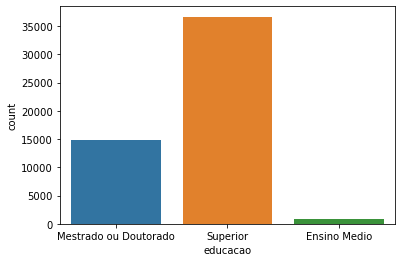

In [7]:
sns.countplot(dadosRH['educacao'])

In [8]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

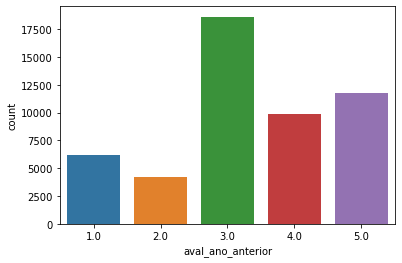

In [9]:
sns.countplot(dadosRH['aval_ano_anterior'])

# lidando com os dados que estão nulos

In [10]:
dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0], inplace = True)

In [11]:
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].mode()[0], inplace = True)

In [12]:
dadosRH.shape

(54808, 11)

In [13]:
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

<AxesSubplot:xlabel='educacao', ylabel='count'>

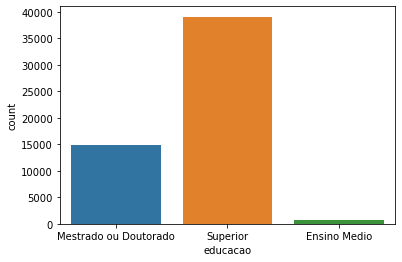

In [14]:
sns.countplot(dadosRH['educacao'])

<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

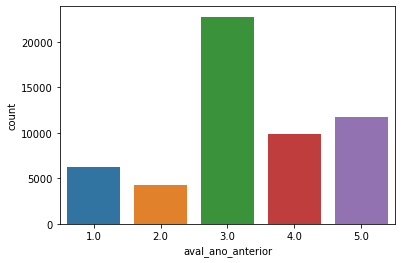

In [15]:
sns.countplot(dadosRH['aval_ano_anterior'])


# verificar balanceamento da variavel 'promovido'

In [16]:
dadosRH.groupby(['promovido']).count()


,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


<AxesSubplot:xlabel='promovido', ylabel='count'>

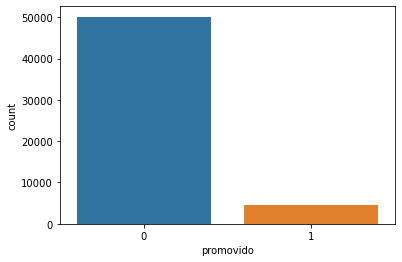

In [17]:
sns.countplot(dadosRH['promovido'])

In [18]:
#criando um dataset para balancear os dados da variavel promovidos
df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [19]:
df_classe_majoritaria.shape

(50140, 11)

In [20]:
df_classe_minoritaria.shape

(4668, 11)

In [21]:
# utilizar upsample
from sklearn.utils import resample
df_classe_minoritaria_upsample = resample(df_classe_minoritaria,
                                          replace = True,
                                          n_samples = 50140,
                                          random_state = 150)

In [22]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsample])

In [23]:
dadosRH_balanceados.promovido.value_counts()

0    50140
1    50140
Name: promovido, dtype: int64

In [24]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


<AxesSubplot:xlabel='promovido', ylabel='count'>

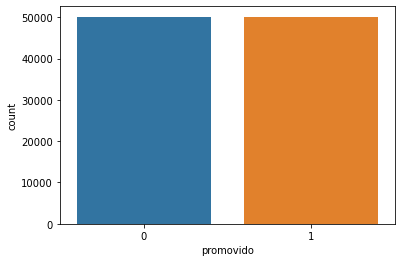

In [25]:
sns.countplot(dadosRH_balanceados['promovido'])

In [26]:
#salvando os dados modificados
dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding = 'utf-8', index = False)

## lendo os dados modificado

In [27]:
dataset= pd.read_csv('dadosRH_modificado.csv')
dataset.head()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0


In [28]:
dataset.shape


(100280, 11)

1- qual a correlação entre os atributos dos funcionarios?

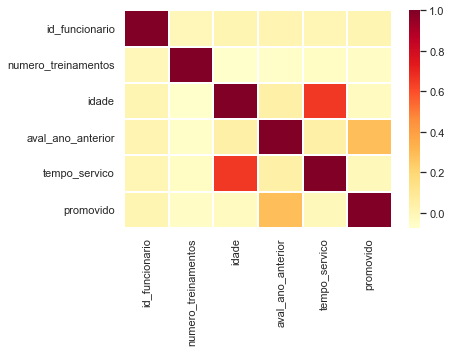

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
corr= dataset.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidths = 0.1)
plt.show()

2- qual o tempo de serviço da maioria dos funcionarios?

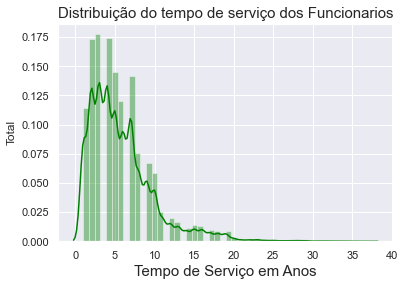

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['tempo_servico'], color = 'green')
plt.title('Distribuição do tempo de serviço dos Funcionarios', fontsize = 15)
plt.xlabel('Tempo de Serviço em Anos', fontsize = 15)
plt.ylabel('Total')
plt.show()

3- Qual a avaliaçao do ano anterios foi mais comum?


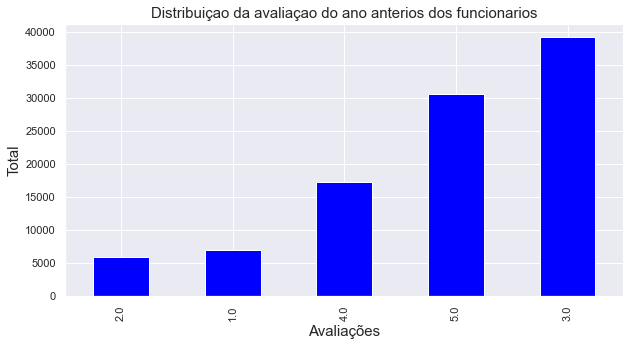

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['aval_ano_anterior'].value_counts().sort_values().plot.bar(color= 'blue', figsize = (10,5))
plt.title('Distribuiçao da avaliaçao do ano anterios dos funcionarios', fontsize = 15 )
plt.xlabel('Avaliações', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.show()

4- qual a distribuiçao das idades dos funcionarios?

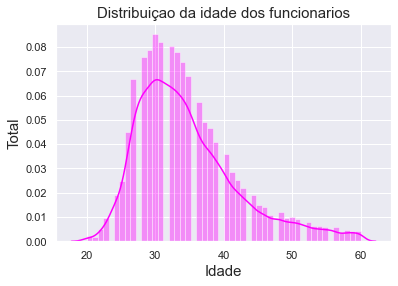

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(dataset['idade'], color = 'magenta')
plt.title('Distribuiçao da idade dos funcionarios', fontsize = 15)
plt.xlabel('Idade', fontsize = 15)
plt.ylabel('Total', fontsize = 15)
plt.show()

5- Qual o numero de Treinamentos mais Frequente?


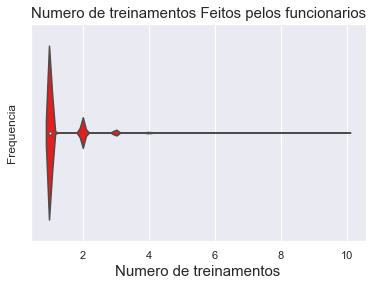

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(dataset['numero_treinamentos'], color = 'red')
plt.title('Numero de treinamentos Feitos pelos funcionarios', fontsize = 15)
plt.xlabel('Numero de treinamentos', fontsize = 15)
plt.ylabel('Frequencia')
plt.show()


6- Qual a proporçao dos funcionarios por canal de recrutamento

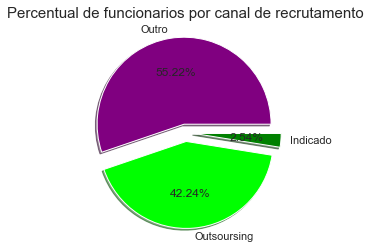

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset['canal_recrutamento'].value_counts()
fatias = [55375,42358,2547]
labels = "Outro","Outsoursing","Indicado"
colors = ["purple","lime", "green"]
explode = [0.1,0.1,0.1]
plt.pie(fatias, labels = labels, colors= colors, explode = explode, shadow = True,autopct = "%.2f%%" )
plt.title('Percentual de funcionarios por canal de recrutamento', fontsize = 15)
plt.axis('off')
#plt.legend()
plt.show()



7- qual a relaçao entre a promoçao e a avaliaçao do ano anterior?

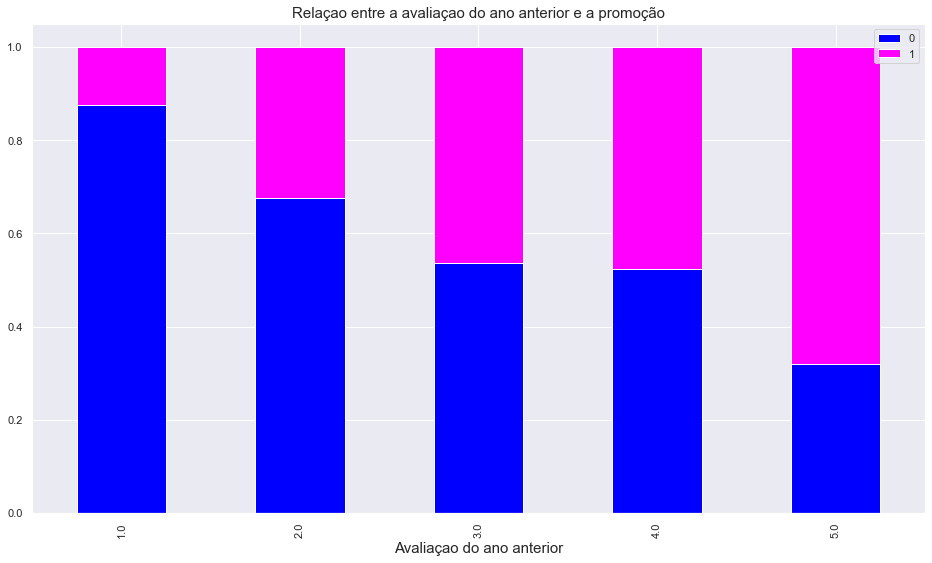

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.crosstab(dataset['aval_ano_anterior'], dataset['promovido']) #criando  uma tabela cruzada
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                  stacked = True, 
                                                  figsize = (16,9),
                                                  color = ['blue', 'magenta'])
plt.title('Relaçao entre a avaliaçao do ano anterior e a promoção', fontsize = 15)
plt.xlabel('Avaliaçao do ano anterior', fontsize = 15)
plt.legend()
plt.show()